# **Exploratory Data Analysis**

Exploring the Computational Fluid Dynamics (CFD) simulations dataset.

*   Author: Nicholas Wolf
*   Date: March 13, 2025

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Reading in the Data**

In [2]:
# First look at the json data
with open('data.json', 'r') as file:
    data = json.load(file)  # Load JSON data into a Python dictionary

print(data)

[{'simulation_id': '0f9eeb8a-e5e5-497a-be00-bbe6407fc4a9', 'shape_id': 'Shape_1', 'date': '2025-02-05T00:00:00', 'design': 'Design_A', 'total_lift': 754766.78, 'total_drag': 30190.67, 'speed': 100.32, 'velocity': {'x': 99.59, 'y': -6.72, 'z': -4.28}, 'pressure': {'front': 377383.39, 'rear': 377383.39, 'top': 22643.0, 'bottom': 7547.67}}, {'simulation_id': 'c5e02cda-0046-48df-8714-b3fdc182c94e', 'shape_id': 'Shape_1', 'date': '2025-02-05T00:00:00', 'design': 'Design_A', 'total_lift': 915976.5, 'total_drag': 36639.06, 'speed': 110.51, 'velocity': {'x': 109.97, 'y': -9.41, 'z': -4.95}, 'pressure': {'front': 457988.25, 'rear': 457988.25, 'top': 27479.3, 'bottom': 9159.77}}, {'simulation_id': '9f32482e-60ef-4931-8403-c8b72d70d90a', 'shape_id': 'Shape_1', 'date': '2025-02-05T00:00:00', 'design': 'Design_A', 'total_lift': 1081060.82, 'total_drag': 43242.43, 'speed': 120.06, 'velocity': {'x': 120.01, 'y': 2.43, 'z': 2.87}, 'pressure': {'front': 540530.41, 'rear': 540530.41, 'top': 32431.82, 'b

#### Comment(s):
*   Looks like tabular data - could do further analysis with pandas.



In [3]:
df = pd.read_json('data.json')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   simulation_id  1260 non-null   object        
 1   shape_id       1260 non-null   object        
 2   date           1260 non-null   datetime64[ns]
 3   design         1260 non-null   object        
 4   total_lift     1260 non-null   float64       
 5   total_drag     1260 non-null   float64       
 6   speed          1260 non-null   float64       
 7   velocity       1260 non-null   object        
 8   pressure       1260 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 88.7+ KB


In [4]:
# Looking at first five rows
df.head(5)

,simulation_id,shape_id,date,design,total_lift,total_drag,speed,velocity,pressure
0,0f9eeb8a-e5e5-497a-be00-bbe6407fc4a9,Shape_1,2025-02-05,Design_A,754766.78,30190.67,100.32,"{'x': 99.59, 'y': -6.72, 'z': -4.28}","{'front': 377383.39, 'rear': 377383.39, 'top':..."
1,c5e02cda-0046-48df-8714-b3fdc182c94e,Shape_1,2025-02-05,Design_A,915976.50,36639.06,110.51,"{'x': 109.97, 'y': -9.41, 'z': -4.95}","{'front': 457988.25, 'rear': 457988.25, 'top':..."
2,9f32482e-60ef-4931-8403-c8b72d70d90a,Shape_1,2025-02-05,Design_A,1081060.82,43242.43,120.06,"{'x': 120.01, 'y': 2.43, 'z': 2.87}","{'front': 540530.41, 'rear': 540530.41, 'top':..."
3,31f26086-42e2-4936-a353-d7af95dc1c5a,Shape_1,2025-02-05,Design_A,1273388.46,50935.54,130.30,"{'x': 129.7, 'y': 8.6, 'z': 2.12}","{'front': 636694.23, 'rear': 636694.23, 'top':..."
4,232919df-85de-48fd-b01a-94af58f4c6fd,Shape_1,2025-02-05,Design_A,1470014.69,58800.59,140.00,"{'x': 140.42, 'y': -0.32, 'z': 0.31}","{'front': 735007.35, 'rear': 735007.35, 'top':..."


In [5]:
# Summary statistics for numerical columns
df.describe()

,date,total_lift,total_drag,speed
count,1260,1.260000e+03,1260.000000,1260.000000
mean,2025-02-09 12:00:00,4.245126e+06,105718.822119,200.115476
min,2025-02-05 00:00:00,7.547668e+05,18516.020000,100.000000
25%,2025-02-07 00:00:00,2.090796e+06,52036.375000,150.050000
50%,2025-02-09 12:00:00,3.828632e+06,95488.560000,200.095000
75%,2025-02-12 00:00:00,6.113234e+06,152421.637500,250.112500
max,2025-02-14 00:00:00,1.074436e+07,270047.800000,300.200000
std,NaN,2.462209e+06,61360.845760,60.535955


In [6]:
# Number of rows and columns
df.shape

(1260, 9)

In [7]:
# Count of missing values by column
df.isnull().sum()  # Count missing values per column

,0
simulation_id,0
shape_id,0
date,0
design,0
total_lift,0
total_drag,0
speed,0
velocity,0
pressure,0


#### Comment(s):
*   No missing data! Cool!
*   It does appear that the velocity and pressure columns contain dictionaries in each row. It would make probably make life easier in the future to parse those out into seperate columns.

In [8]:
# Velocity column

df['velocity'].head()

,velocity
0,"{'x': 99.59, 'y': -6.72, 'z': -4.28}"
1,"{'x': 109.97, 'y': -9.41, 'z': -4.95}"
2,"{'x': 120.01, 'y': 2.43, 'z': 2.87}"
3,"{'x': 129.7, 'y': 8.6, 'z': 2.12}"
4,"{'x': 140.42, 'y': -0.32, 'z': 0.31}"


In [9]:
# Pressure column

df['pressure'].head()

,pressure
0,"{'front': 377383.39, 'rear': 377383.39, 'top':..."
1,"{'front': 457988.25, 'rear': 457988.25, 'top':..."
2,"{'front': 540530.41, 'rear': 540530.41, 'top':..."
3,"{'front': 636694.23, 'rear': 636694.23, 'top':..."
4,"{'front': 735007.35, 'rear': 735007.35, 'top':..."


## **Data Transformation**

Seperating Velocity and Pressure dictionaries out into individual columns.

In [10]:
df['velocity_x'] = df['velocity'].apply(lambda v: v['x'])
df['velocity_y'] = df['velocity'].apply(lambda v: v['y'])
df['velocity_z'] = df['velocity'].apply(lambda v: v['z'])

df['pressure_front'] = df['pressure'].apply(lambda p: p['front'])
df['pressure_rear'] = df['pressure'].apply(lambda p: p['rear'])
df['pressure_top'] = df['pressure'].apply(lambda p: p['top'])
df['pressure_bottom'] = df['pressure'].apply(lambda p: p['bottom'])

# Drop original columns since we extracted the necessary info
df.drop(columns=['velocity', 'pressure'], inplace=True)

# Looking at the change
df.head()

,simulation_id,shape_id,date,design,total_lift,total_drag,speed,velocity_x,velocity_y,velocity_z,pressure_front,pressure_rear,pressure_top,pressure_bottom
0,0f9eeb8a-e5e5-497a-be00-bbe6407fc4a9,Shape_1,2025-02-05,Design_A,754766.78,30190.67,100.32,99.59,-6.72,-4.28,377383.39,377383.39,22643.00,7547.67
1,c5e02cda-0046-48df-8714-b3fdc182c94e,Shape_1,2025-02-05,Design_A,915976.50,36639.06,110.51,109.97,-9.41,-4.95,457988.25,457988.25,27479.30,9159.77
2,9f32482e-60ef-4931-8403-c8b72d70d90a,Shape_1,2025-02-05,Design_A,1081060.82,43242.43,120.06,120.01,2.43,2.87,540530.41,540530.41,32431.82,10810.61
3,31f26086-42e2-4936-a353-d7af95dc1c5a,Shape_1,2025-02-05,Design_A,1273388.46,50935.54,130.30,129.70,8.60,2.12,636694.23,636694.23,38201.65,12733.88
4,232919df-85de-48fd-b01a-94af58f4c6fd,Shape_1,2025-02-05,Design_A,1470014.69,58800.59,140.00,140.42,-0.32,0.31,735007.35,735007.35,44100.44,14700.15


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   simulation_id    1260 non-null   object        
 1   shape_id         1260 non-null   object        
 2   date             1260 non-null   datetime64[ns]
 3   design           1260 non-null   object        
 4   total_lift       1260 non-null   float64       
 5   total_drag       1260 non-null   float64       
 6   speed            1260 non-null   float64       
 7   velocity_x       1260 non-null   float64       
 8   velocity_y       1260 non-null   float64       
 9   velocity_z       1260 non-null   float64       
 10  pressure_front   1260 non-null   float64       
 11  pressure_rear    1260 non-null   float64       
 12  pressure_top     1260 non-null   float64       
 13  pressure_bottom  1260 non-null   float64       
dtypes: datetime64[ns](1), float64(10), objec

In [12]:
# Check for missing data
df.isnull().sum()

,0
simulation_id,0
shape_id,0
date,0
design,0
total_lift,0
total_drag,0
speed,0
velocity_x,0
velocity_y,0
velocity_z,0


In [13]:
# Checking for duplicated rows
df.duplicated().sum()

np.int64(0)

#### Comment(s):
*   Still no missing data, even cooler!
*   Data types for each column seem okay for now.

In [14]:
# Looking again at summary statistics with new columns

df.describe()

,date,total_lift,total_drag,speed,velocity_x,velocity_y,velocity_z,pressure_front,pressure_rear,pressure_top,pressure_bottom
count,1260,1.260000e+03,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03,1.260000e+03,1260.000000,1260.000000
mean,2025-02-09 12:00:00,4.245126e+06,105718.822119,200.115476,200.001238,-0.187183,0.060770,2.122563e+06,2.122563e+06,79289.116595,26429.705413
min,2025-02-05 00:00:00,7.547668e+05,18516.020000,100.000000,99.560000,-9.990000,-5.000000,3.773834e+05,3.773834e+05,13887.020000,4629.010000
25%,2025-02-07 00:00:00,2.090796e+06,52036.375000,150.050000,149.760000,-5.055000,-2.320000,1.045398e+06,1.045398e+06,39027.282500,13009.092500
50%,2025-02-09 12:00:00,3.828632e+06,95488.560000,200.095000,199.995000,-0.340000,-0.025000,1.914316e+06,1.914316e+06,71616.420000,23872.140000
75%,2025-02-12 00:00:00,6.113234e+06,152421.637500,250.112500,250.185000,4.600000,2.580000,3.056617e+06,3.056617e+06,114316.227500,38105.410000
max,2025-02-14 00:00:00,1.074436e+07,270047.800000,300.200000,300.500000,9.990000,5.000000,5.372179e+06,5.372179e+06,202535.850000,67511.950000
std,NaN,2.462209e+06,61360.845760,60.535955,60.584791,5.742680,2.882807,1.231105e+06,1.231105e+06,46020.634163,15340.211390


## **Initial Observations & Questions**



In [15]:
# Are simulation IDs unique?

unique_simulation_ids = df['simulation_id'].nunique()
print(f"Number of unique simulation IDs: {unique_simulation_ids}")

number_of_rows_in_df = df.shape[0]
print(f"Number of rows in the DataFrame: {number_of_rows_in_df}")

Number of unique simulation IDs: 1260
Number of rows in the DataFrame: 1260


Looks like each row corresponds to a unique simulation ID.

In [16]:
# How many shapes do we have?

df['shape_id'].value_counts()

,count
shape_id,
Shape_1,420
Shape_2,420
Shape_3,420


In [17]:
# How many designs do we have?
df['design'].value_counts()

,count
design,
Design_A,630
Design_B,630


In [18]:
# Shape & Design combinations

df.groupby(['shape_id', 'design']).size()

shape_id  design  
Shape_1   Design_A    210
          Design_B    210
Shape_2   Design_A    210
          Design_B    210
Shape_3   Design_A    210
          Design_B    210
dtype: int64

Appears that there are two designs, each with three different shapes.

## **Basic Visualizations**

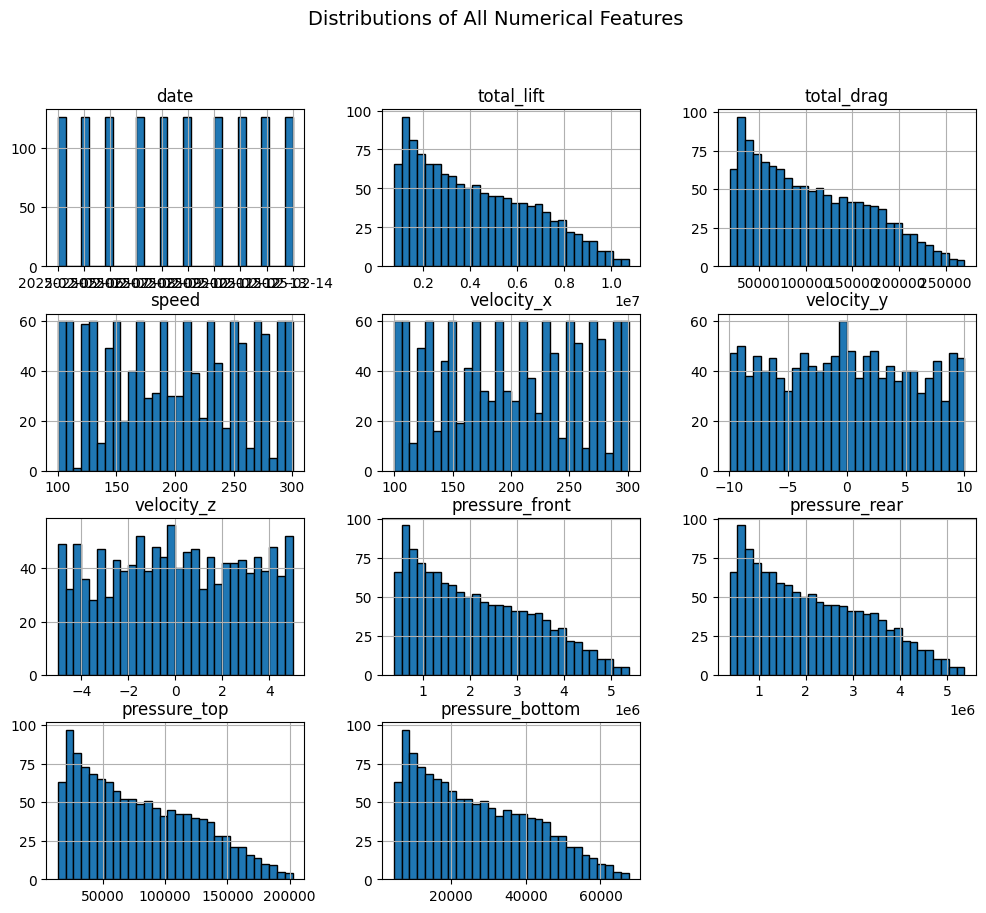

In [19]:
# Histograms for All Numerical Columns

df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.suptitle("Distributions of All Numerical Features", fontsize=14)
plt.show()

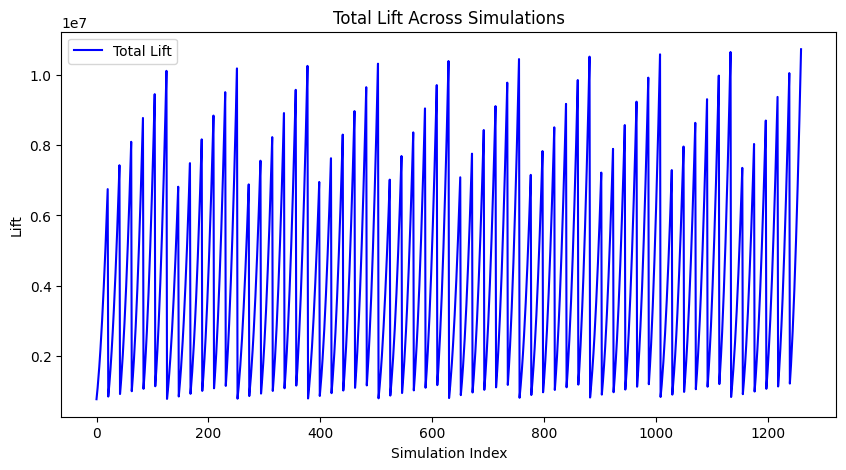

In [20]:
# Total Lift accross Simulations

plt.figure(figsize=(10, 5))
plt.plot(df.index, df["total_lift"], label="Total Lift", color='b')
plt.xlabel("Simulation Index")
plt.ylabel("Lift")
plt.title("Total Lift Across Simulations")
plt.legend()
plt.show()

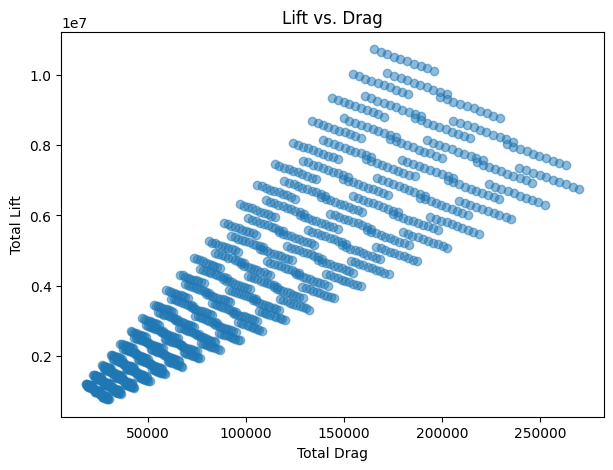

In [21]:
# Lift vs. Drag Scatter Plot
plt.figure(figsize=(7, 5))
plt.scatter(df["total_drag"], df["total_lift"], alpha=0.5)
plt.xlabel("Total Drag")
plt.ylabel("Total Lift")
plt.title("Lift vs. Drag")
plt.show()

## **Additional Features**


Configuration: Combination of design and shape.



In [22]:
df['design_shape_config'] = df['design'] + "_" + df['shape_id']

Velocity Magnitude: total speed considering all three velocity components (x, y, z), computed with the Euclidean norm. I.e., speed.

In [23]:
df['velocity_magnitude'] = np.sqrt(
    df['velocity_x']**2 +
    df['velocity_y']**2 +
    df['velocity_z']**2)

It was at this point I realized velocity magnitude (speed) was already provided...

Let's double check that.

In [24]:
df_copy = df[["speed", "velocity_magnitude"]].copy()
df_copy.head()

,speed,velocity_magnitude
0,100.32,99.908182
1,110.51,110.482811
2,120.06,120.068905
3,130.30,130.002094
4,140.00,140.420707


Yep, appears so.


Pressure "Magnitude": not really a true magnitude since pressure is a scalar quantity (no directional components). May or may not be useful in further analysis.

Thought here is to get a single measure of total pressure influence. Simplying summing the different pressures could cancel out important effects.


In [25]:
df['pressure_magnitude'] = np.sqrt(
    df['pressure_front']**2 +
    df['pressure_rear']**2 +
    df['pressure_top']**2 +
    df['pressure_bottom']**2)

Lift to Drag Ratio (L/D): A measure of how much lift an aircraft generates compared to the drag it experiences.
L/D = Total Lift divided by Total Drag.

Different aircraft will aim for different L/D ratios.
*   Fighter jets prioritize maneuverability over efficiency, and thus typically have lower L/D (4:1 -> 2:1)
* Commericial airliners need to maximize fuel efficiency over longer distances, so typically L/D ratios of 15 - 20
* Something like a glider would need a high L/D ratio to stay in the air.

In [26]:
df['L_D_ratio'] = df['total_lift'] / df['total_drag']

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   simulation_id        1260 non-null   object        
 1   shape_id             1260 non-null   object        
 2   date                 1260 non-null   datetime64[ns]
 3   design               1260 non-null   object        
 4   total_lift           1260 non-null   float64       
 5   total_drag           1260 non-null   float64       
 6   speed                1260 non-null   float64       
 7   velocity_x           1260 non-null   float64       
 8   velocity_y           1260 non-null   float64       
 9   velocity_z           1260 non-null   float64       
 10  pressure_front       1260 non-null   float64       
 11  pressure_rear        1260 non-null   float64       
 12  pressure_top         1260 non-null   float64       
 13  pressure_bottom      1260 non-nul

## **Design/Shape Comparisons**

Looks like we have two designs, each with three shape configurations. Let's compare them.

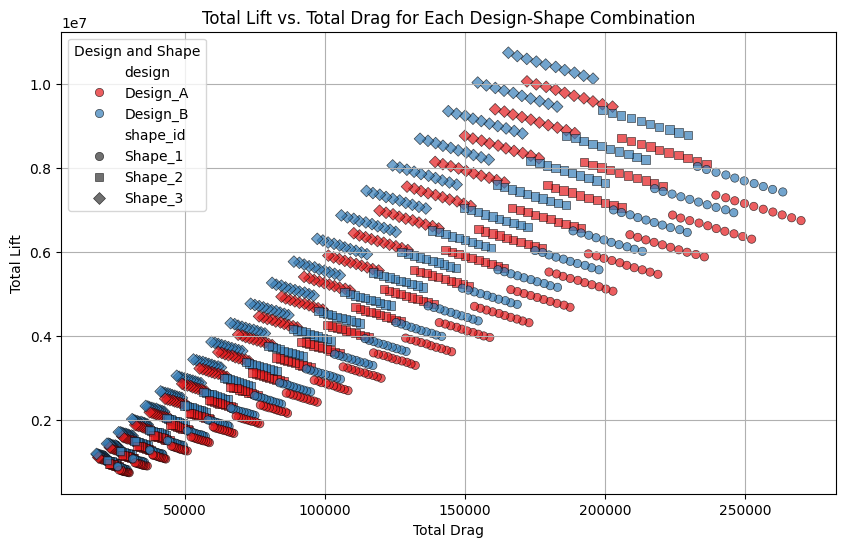

In [28]:
#Lift vs. Drag for Different Designs & Shapes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_drag', y='total_lift', hue='design', style='shape_id',
                data=df, palette='Set1', markers=["o", "s", "D",],
                alpha=0.7, edgecolor='black')

plt.title('Total Lift vs. Total Drag for Each Design-Shape Combination')
plt.xlabel('Total Drag')
plt.ylabel('Total Lift')
plt.legend(title='Design and Shape', loc='upper left')
plt.grid(True)

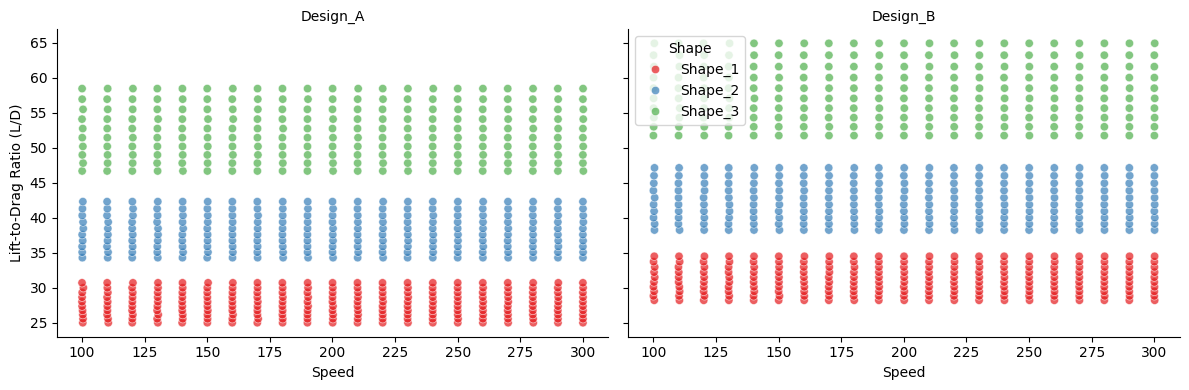

In [29]:
# FacetGrid for each 'design' with L/D ratio vs. speed
g = sns.FacetGrid(df, col='design', height=4, aspect=1.5)
g.map(sns.scatterplot, 'speed', 'L_D_ratio',
      data=df, hue='shape_id', palette='Set1', alpha=0.7)

g.set_axis_labels('Speed', 'Lift-to-Drag Ratio (L/D)')
g.set_titles('{col_name}')
plt.legend(title='Shape', loc='upper left')
plt.show()

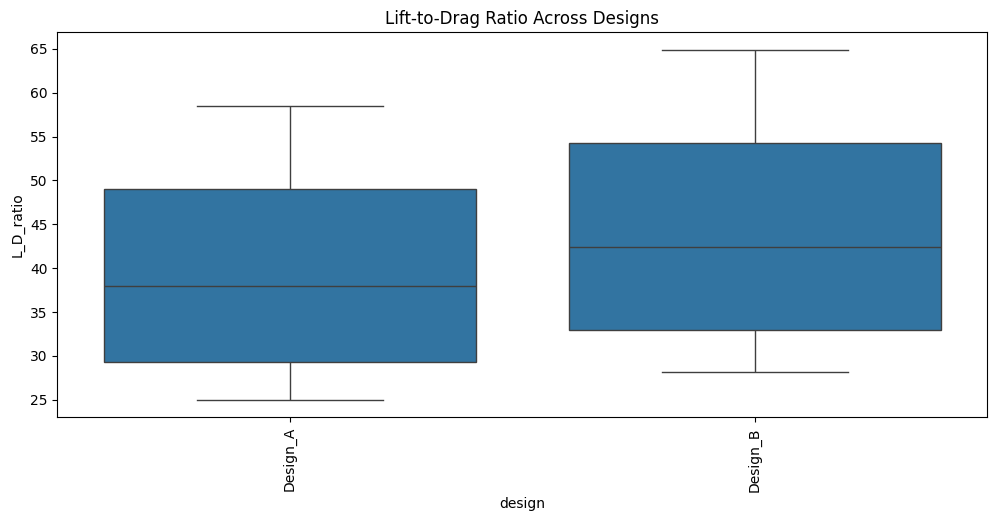

In [31]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='design', y='L_D_ratio', data=df)
plt.xticks(rotation=90)
plt.title("Lift-to-Drag Ratio Across Designs")
plt.show()

In [32]:
design_config_df = df[["design", "shape_id", "L_D_ratio"]].copy()
design_config_df = design_config_df.groupby(
                                     ["design", "shape_id"],
                                     as_index=False)["L_D_ratio"].mean()

design_config_df.head(10)

,design,shape_id,L_D_ratio
0,Design_A,Shape_1,27.751308
1,Design_A,Shape_2,38.127211
2,Design_A,Shape_3,52.266030
3,Design_B,Shape_1,31.234798
4,Design_B,Shape_2,42.490263
5,Design_B,Shape_3,57.982286


#### Comment(s):
*   Appears that Design_B may have higher Lift to Drag ratios than Design_A.
*   Lift to Drag ratios between shapes appear to go (from highest to lowest): Shape_3, Shape_2, Shape_1.

## **Pressure Distributions**

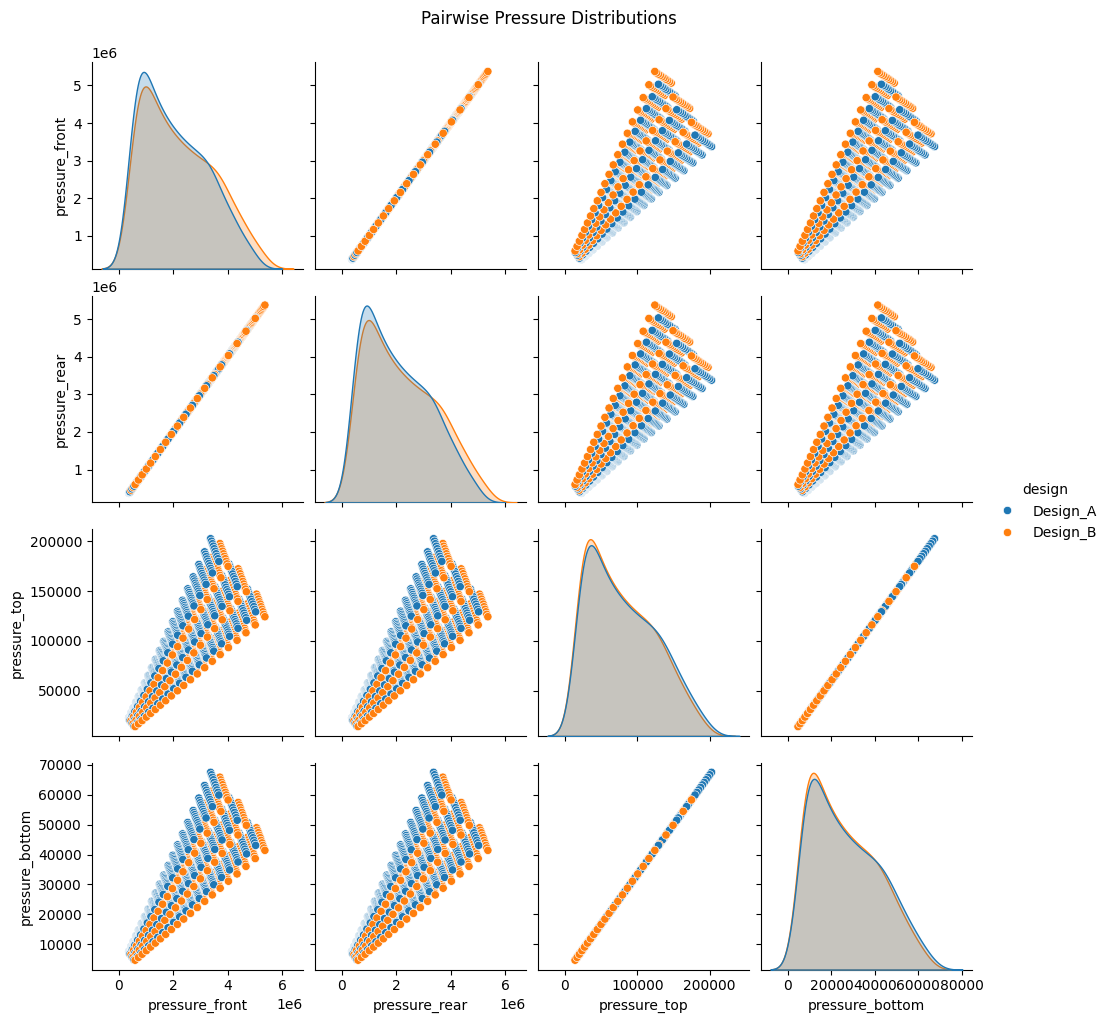

In [33]:
# Pairplot to see relationships between different pressure variables
sns.pairplot(df, vars=['pressure_front', 'pressure_rear', 'pressure_top', 'pressure_bottom'], hue='design')
plt.suptitle("Pairwise Pressure Distributions", y=1.02)
plt.show()

In [34]:
corr_matrix = df[['pressure_front', 'pressure_rear', 'pressure_top', 'pressure_bottom', 'total_lift', 'total_drag']].corr()
print(corr_matrix)

                 pressure_front  pressure_rear  pressure_top  pressure_bottom  \
pressure_front         1.000000       1.000000      0.861023         0.861023   
pressure_rear          1.000000       1.000000      0.861023         0.861023   
pressure_top           0.861023       0.861023      1.000000         1.000000   
pressure_bottom        0.861023       0.861023      1.000000         1.000000   
total_lift             1.000000       1.000000      0.861023         0.861023   
total_drag             0.861023       0.861023      1.000000         1.000000   

                 total_lift  total_drag  
pressure_front     1.000000    0.861023  
pressure_rear      1.000000    0.861023  
pressure_top       0.861023    1.000000  
pressure_bottom    0.861023    1.000000  
total_lift         1.000000    0.861023  
total_drag         0.861023    1.000000  


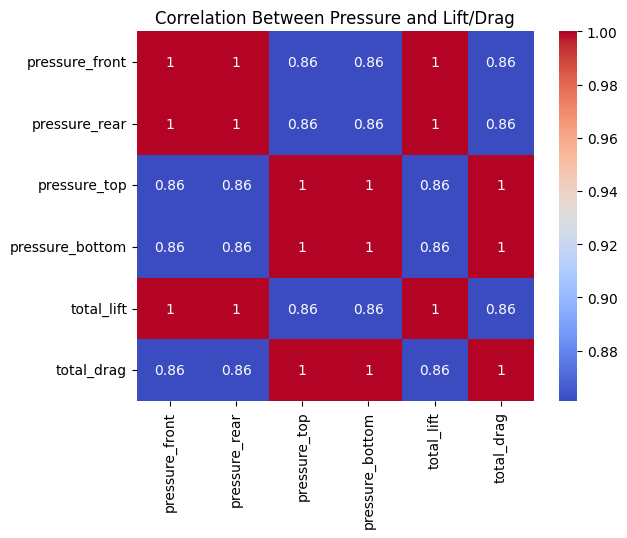

In [35]:
corr_matrix = df[['pressure_front', 'pressure_rear', 'pressure_top', 'pressure_bottom',
                  'total_lift', 'total_drag']].corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Between Pressure and Lift/Drag")
plt.show()

Check Correlations Between Velocity and Lift/Drag

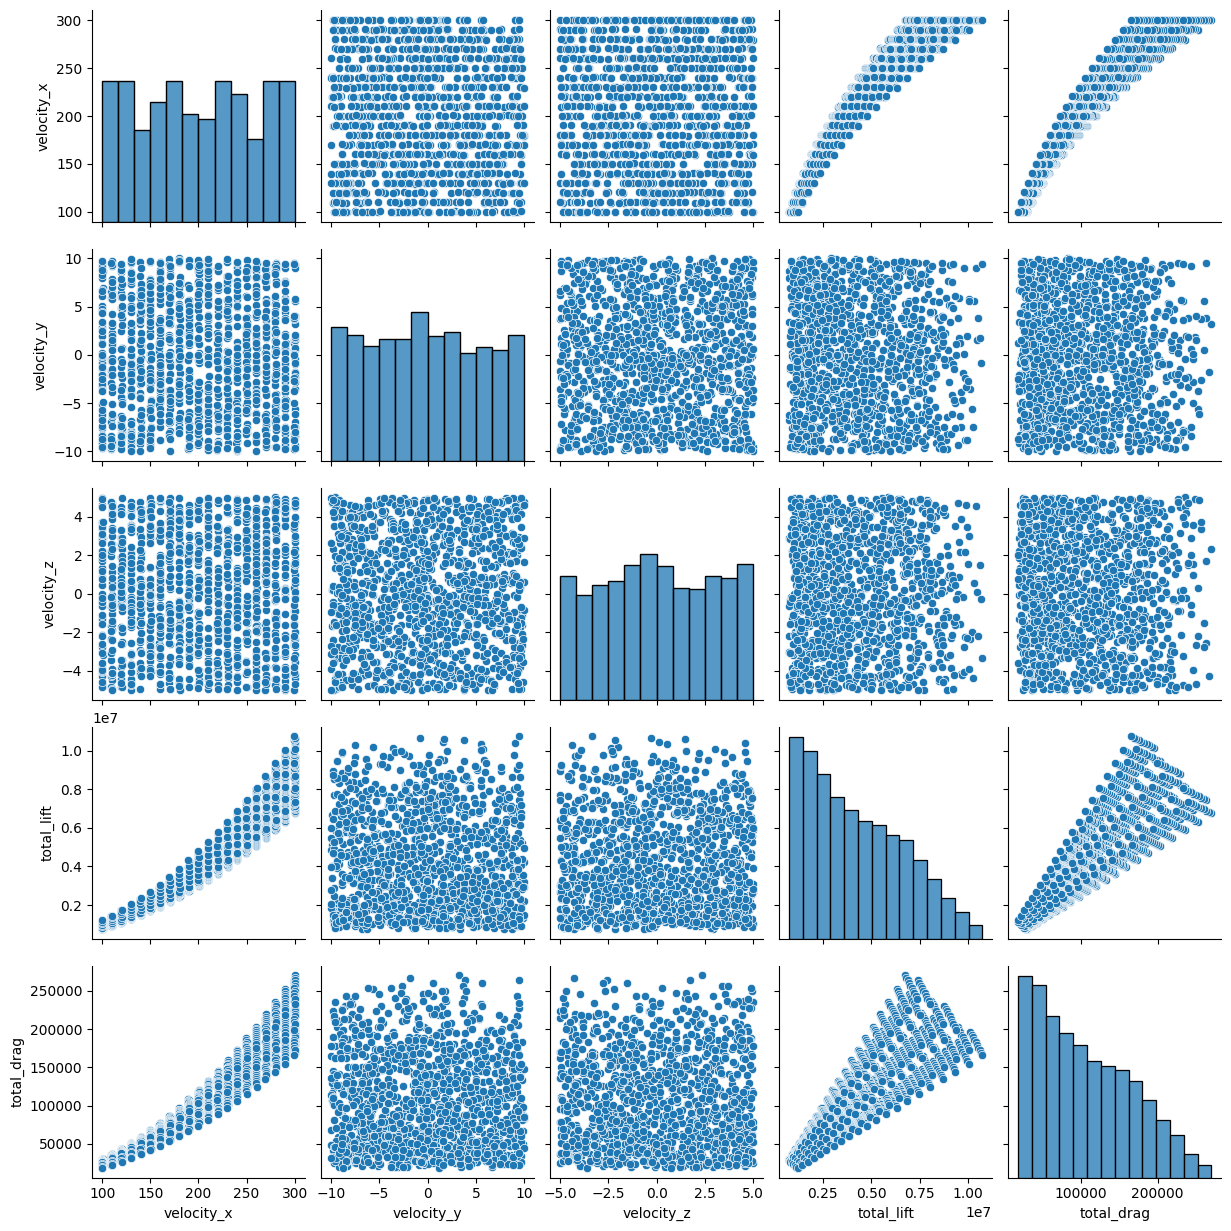

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['velocity_x', 'velocity_y', 'velocity_z', 'total_lift', 'total_drag']])
plt.show()

## **Advanced Analysis**

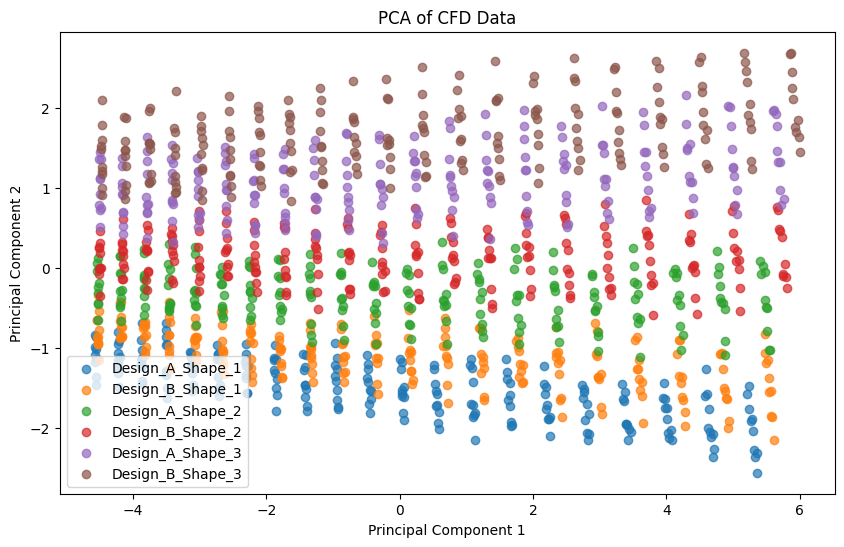

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load your data (assuming df is your DataFrame)

# Select numerical features for PCA (excluding categorical columns)
features = ['total_lift', 'total_drag', 'speed', 'velocity_x', 'velocity_y', 'velocity_z',
            'pressure_front', 'pressure_rear', 'pressure_top', 'pressure_bottom',
            'velocity_magnitude', 'pressure_magnitude', 'L_D_ratio']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2D for visualization
principal_components = pca.fit_transform(scaled_data)

# Convert to DataFrame
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['design_shape_config'] = df['design_shape_config']  # Keep shape info

# Plot PCA results
plt.figure(figsize=(10, 6))
for shape in df_pca['design_shape_config'].unique():
    subset = df_pca[df_pca['design_shape_config'] == shape]
    plt.scatter(subset['PC1'], subset['PC2'], label=shape, alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of CFD Data')
plt.legend()
plt.show()

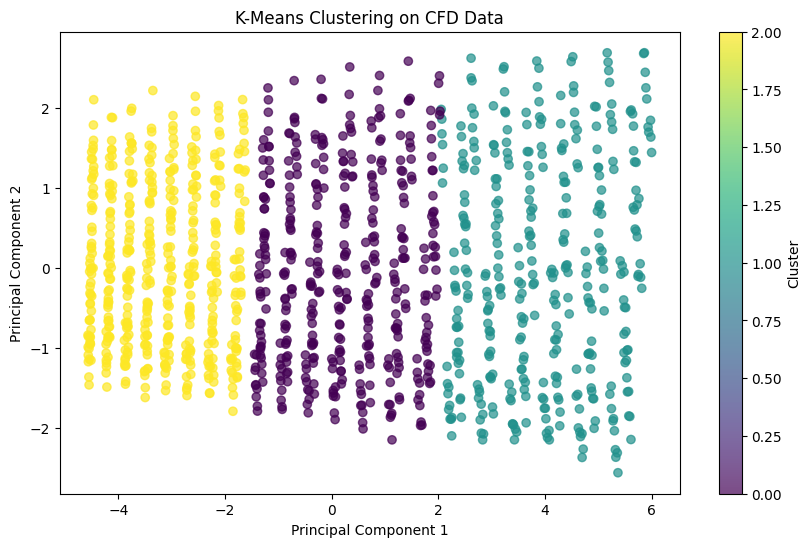

In [38]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust number of clusters as needed
df_pca['Cluster'] = kmeans.fit_predict(scaled_data)

# Plot clustering results
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on CFD Data')
plt.colorbar(label='Cluster')
plt.show()

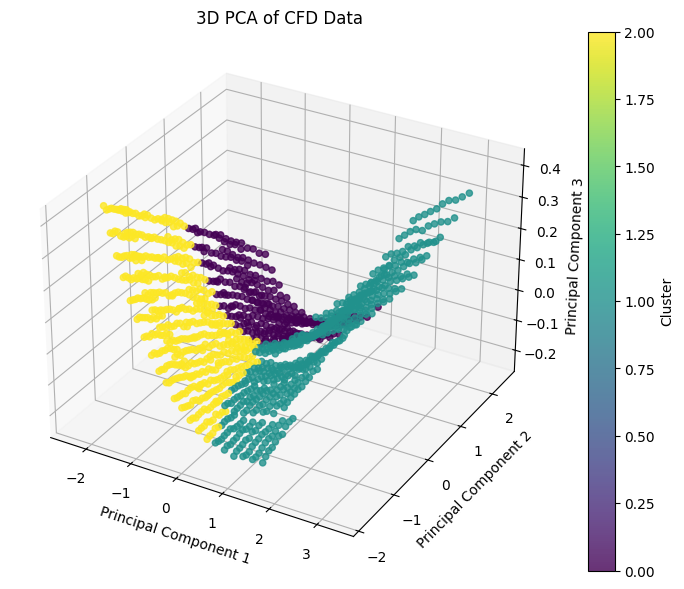

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Select numerical features for PCA
features = ['velocity_magnitude', 'pressure_magnitude', 'L_D_ratio']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

# Apply PCA (3 components)
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_data)

# Convert to DataFrame
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
df_pca['design'] = df['design']

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust clusters if needed
df_pca['Cluster'] = kmeans.fit_predict(scaled_data)

# 3D Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with clusters
scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'],
                     c=df_pca['Cluster'], cmap='viridis', alpha=0.8)

# Labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of CFD Data')

# Colorbar
plt.colorbar(scatter, label='Cluster')

plt.show()
